# Matin Ghorbani 6.2.Assignment
---

## Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from knn_finding_nemo_dory import KNN

## Create a train dataset for nemo pixels and background pixels. Like orange and white, add black for Nemo's body to get better results.

### Preprocessing on image

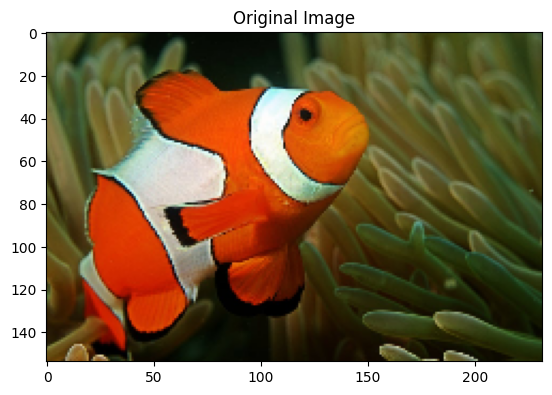

In [2]:
nemo = cv.imread('resources/nemo.jpg')
nemo = cv.resize(nemo, (0, 0), None, .25, .25)
nemo_hsv = cv.cvtColor(nemo, cv.COLOR_BGR2HSV)
nemo_rgb = cv.cvtColor(nemo, cv.COLOR_BGR2RGB)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

plt.imshow(nemo_rgb)
plt.title('Original Image')
plt.show()

### Orange Mask

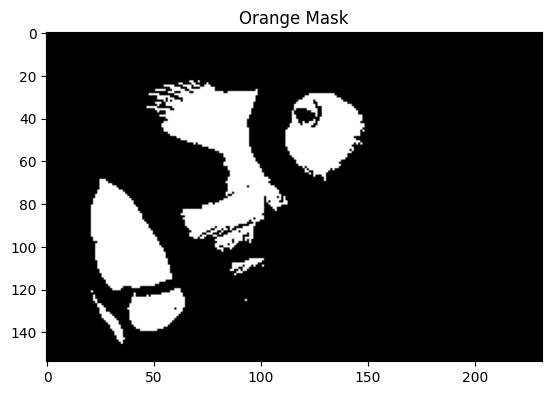

In [3]:
light_orange = (1, 90, 200)
dark_orange = (18, 255, 255)
orange_mask = cv.inRange(nemo_hsv, light_orange, dark_orange)

plt.imshow(orange_mask, 'gray')
plt.title('Orange Mask')
plt.show()

### White Mask

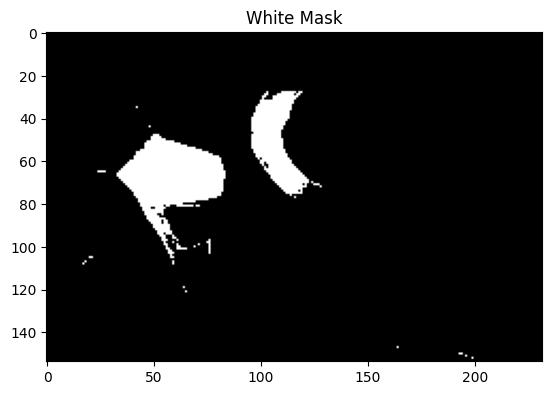

In [4]:
light_white = (0, 0, 190)
dark_white = (145, 60, 255)
white_mask = cv.inRange(nemo_hsv, light_white, dark_white)

plt.imshow(white_mask, 'gray')
plt.title('White Mask')
plt.show()

### Black Mask

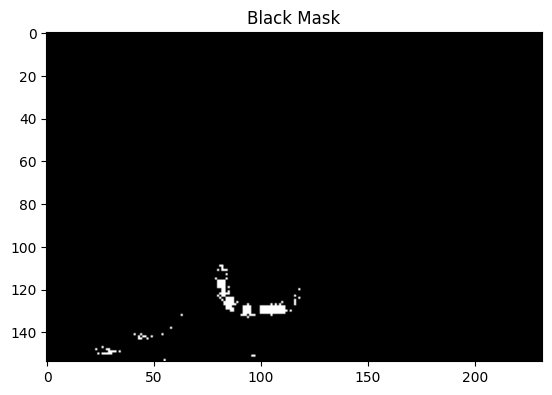

In [6]:
light_black = (0, 0, 0)
dark_black = (255, 250, 5)
black_mask = cv.inRange(nemo_hsv, light_black, dark_black)

plt.imshow(black_mask, 'gray')
plt.title('Black Mask')
plt.show()

## Final Mask

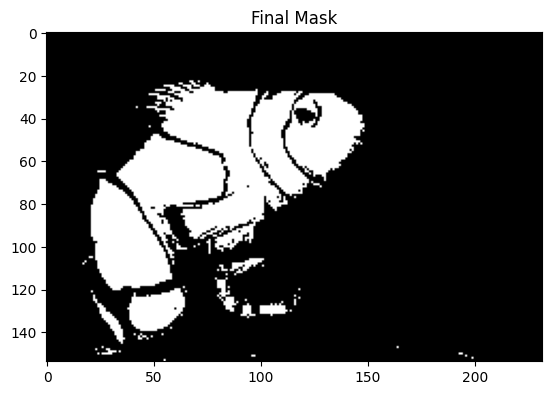

In [11]:
final_mask = orange_mask + white_mask + black_mask
plt.imshow(final_mask, 'gray')
plt.title('Final Mask')
plt.show()

## Fit our KNN on the train dataset.

In [12]:
x_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1, )

In [13]:
knn = KNN(3)
knn.fit(x_train, y_train)

## Predict nemo pixels and background pixels for new test images.

### Preprocessing on new nemo image

In [17]:
new_nemo = cv.imread('resources/abjie-nemo.jpg')
new_nemo = cv.resize(new_nemo, (0, 0), None, .1, .1)
new_nemo_hsv = cv.cvtColor(new_nemo, cv.COLOR_BGR2HSV)

In [18]:
x_test = new_nemo_hsv.reshape(-1, 3) / 255
y_pred = knn.predict(x_test)

## Final Result

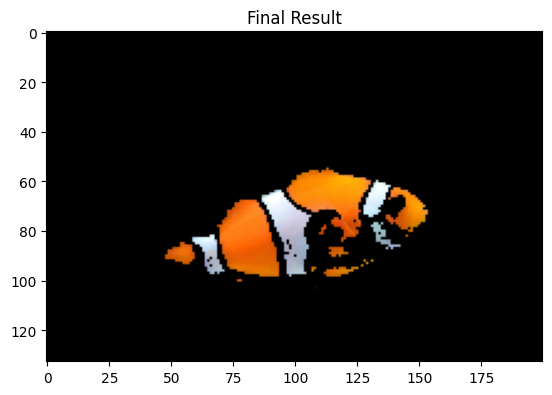

In [21]:
result = np.array(y_pred).reshape(new_nemo.shape[:2])
result = result.astype('uint8')

final_result = cv.bitwise_and(new_nemo, new_nemo, mask=result)
final_result = cv.cvtColor(final_result, cv.COLOR_BGR2RGB)
plt.imshow(final_result)
plt.title('Final Result')
plt.show()